In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
# Cargar datos
df = pd.read_csv(r"C:\Users\angel\OneDrive\Escritorio\OCTAVO SEM\MINERIA DE DATOS\REPOSITORIO\AOAG_MinDat035\DATASET\players_20.csv")

Para esta practica se busca crear un modelo de regresión linear para predecir el Overall de un jugador a partir de 4 variables predictoras: AGE, POTENTIAL, VALUE_EUR, WAGE_EUR

In [16]:
#Seleccionar variables predictoras y la variable objetivo
X = df[['age', 'potential', 'value_eur', 'wage_eur']]
y = df['overall']

In [17]:
# Eliminar filas con valores nulos
X = X.dropna()
y = y.loc[X.index]


In [18]:
# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [21]:
# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


R2 Score: 0.8678114504239207


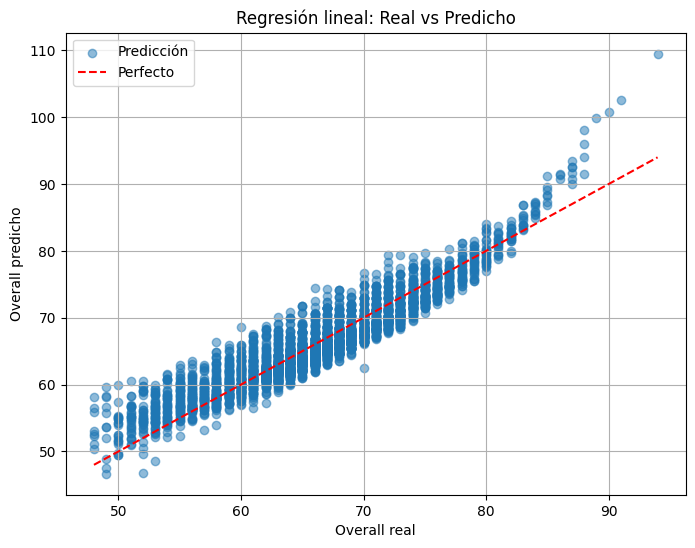

In [22]:
# Gráfico de dispersión: valores reales vs predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfecto')
plt.xlabel("Overall real")
plt.ylabel("Overall predicho")
plt.title("Regresión lineal: Real vs Predicho")
plt.legend()
plt.grid(True)
plt.show()

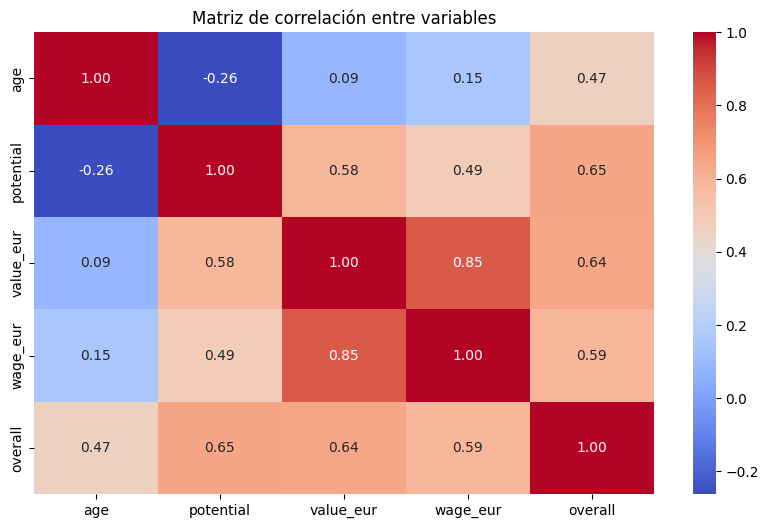

In [23]:
# Heatmap de correlación entre variables
plt.figure(figsize=(10,6))
corr_matrix = df[['age', 'potential', 'value_eur', 'wage_eur', 'overall']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()